In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train and test data path

In [2]:
train_path = '/content/drive/MyDrive/ML/Wild-Animal-Cat-Dog-Face-Classification-Deep-Leaning-master/train'
test_path = '/content/drive/MyDrive/ML/Wild-Animal-Cat-Dog-Face-Classification-Deep-Leaning-master/val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Augmentation

In [4]:
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True,vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_datagen.flow_from_directory(train_path,target_size=(100,100),class_mode='categorical',batch_size=batch_size)

test_set = test_datagen.flow_from_directory(test_path,target_size=(100,100),class_mode='categorical',batch_size=batch_size)

Found 300 images belonging to 3 classes.
Found 140 images belonging to 3 classes.


In [7]:
test_set.class_indices

{'cat': 0, 'dog': 1, 'zebra': 2}

In [8]:
train_set.class_indices

{'cat': 0, 'dog': 1, 'zebra': 2}

Import required libraries

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16
import tensorflow as tf
from tensorflow.keras.models import  Model
from tensorflow.keras.preprocessing import image

Defined pretrained VGG16 model

In [10]:

vgg = VGG16(include_top=False,weights="imagenet",input_shape=(100,100,3))


58889256/58889256 [==============================] - 2s 0us/step


Disable hidden layer so that trained layers not train again

In [11]:
for layer in vgg.layers:
  layer.trainable=False

In [12]:
x = Flatten()(vgg.output)

Define output layer

In [13]:
x = Dense(3, activation='softmax')(x)

In [14]:
model = Model(inputs=vgg.input, outputs=x)

Compile model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Check model summary

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

Train model and run for 20 epochs

In [17]:
epochs = 20
history = model.fit(train_set, batch_size=8, 
                    epochs=epochs, 
                    validation_data=test_set,
                    steps_per_epoch=len(train_set),
                    validation_steps=(len(test_set)))

Epoch 1/20
10/10 [==============================] - 133s 13s/step - loss: 1.0899 - accuracy: 0.4967 - val_loss: 0.7603 - val_accuracy: 0.6929
Epoch 2/20
10/10 [==============================] - 3s 319ms/step - loss: 0.7518 - accuracy: 0.6467 - val_loss: 0.3654 - val_accuracy: 0.8643
Epoch 3/20
10/10 [==============================] - 3s 267ms/step - loss: 0.6094 - accuracy: 0.7500 - val_loss: 0.3512 - val_accuracy: 0.9000
Epoch 4/20
10/10 [==============================] - 3s 332ms/step - loss: 0.4948 - accuracy: 0.8233 - val_loss: 0.2677 - val_accuracy: 0.9429
Epoch 5/20
10/10 [==============================] - 3s 357ms/step - loss: 0.4228 - accuracy: 0.8567 - val_loss: 0.2308 - val_accuracy: 0.9357
Epoch 6/20
10/10 [==============================] - 3s 279ms/step - loss: 0.4193 - accuracy: 0.8500 - val_loss: 0.2357 - val_accuracy: 0.9571
Epoch 7/20
10/10 [==============================] - 3s 278ms/step - loss: 0.3893 - accuracy: 0.8667 - val_loss: 0.1937 - val_accuracy: 0.9357
Epoch 

Save model

In [18]:
model.save('/content/drive/MyDrive/ML/Wild-Animal-Cat-Dog-Face-Classification-Deep-Leaning-master/dog_cat_wild_face_classifier.h5')

In [19]:
model.save('dog_cat_wild_face_classifier.h5')

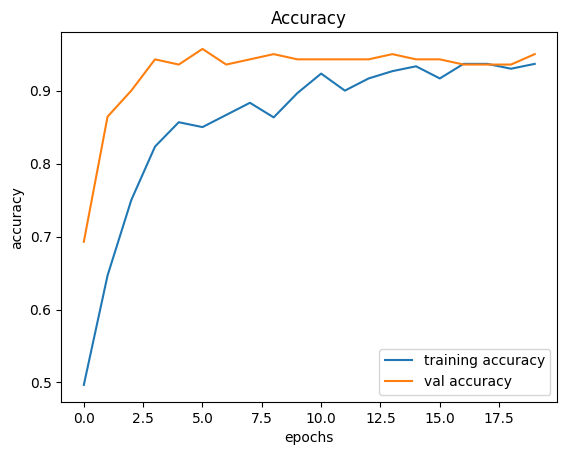

In [20]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

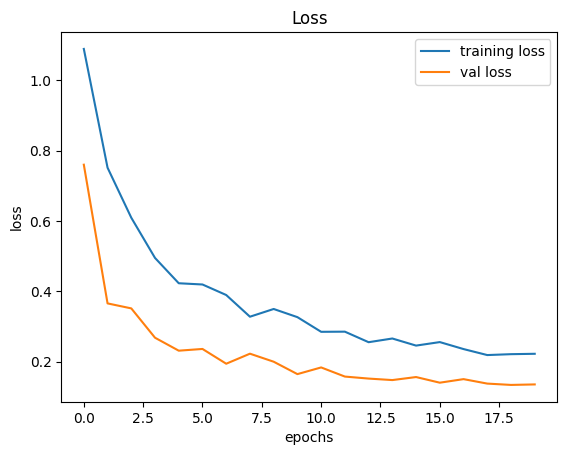

In [21]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Evaluate

In [22]:
score = model.evaluate(test_set)
print('Test accuracy:', score[1])

5/5 [==============================] - 1s 159ms/step - loss: 0.1348 - accuracy: 0.9500
Test accuracy: 0.949999988079071


Test model

In [23]:
def test_model(img_path):
  img = image.load_img(img_path,target_size=(100,100))
  
  x1=image.img_to_array(img)
  x1=x1/255
  x1=np.expand_dims(x1,axis=0)
  pred1 = np.argmax(model.predict(x1)[0], axis=-1)
  if pred1==0:
    print('Cat Face')
  elif pred1==1:
    print('Dog Face')
  elif pred1 == 2:
    print('Zebra Face')
  else:
    print('Wild Animal Face')

In [24]:
img_path='/content/drive/MyDrive/ML/Wild-Animal-Cat-Dog-Face-Classification-Deep-Leaning-master/test_img/GettyImages-1043597638-49acd69677d7442588c1d8930d298a59.jpg'
test_model(img_path)

1/1 [==============================] - 1s 630ms/step
Zebra Face


## **Extra Development**






In [25]:
from google.colab import files

In [28]:
uploaded = files.upload()

Saving HjFE8NKWuCmgfHCcndJ3rK-1200-80.jpg to HjFE8NKWuCmgfHCcndJ3rK-1200-80.jpg


### **Output The Prediction**

In [29]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)

img_path = name
test_model(img_path)

1/1 [==============================] - 0s 27ms/step
Zebra Face
